In [1]:
import numpy as np
import pandas as pd
import io
from scipy import stats
import seaborn as sns

In [2]:
from google.colab import files
uploaded = files.upload()

Saving SuperStore.csv to SuperStore.csv


In [4]:
df = pd.read_csv(io.BytesIO(uploaded['SuperStore.csv']))
print(df)

      Row ID        Order ID  Order Date   Ship Date       Ship Mode  \
0          1  CA-2017-152156  08-11-2017  11-11-2017    Second Class   
1          2  CA-2017-152156  08-11-2017  11-11-2017    Second Class   
2          3  CA-2017-138688  12-06-2017  16-06-2017    Second Class   
3          4  US-2016-108966  11-10-2016  18-10-2016  Standard Class   
4          5  US-2016-108966  11-10-2016  18-10-2016  Standard Class   
...      ...             ...         ...         ...             ...   
9795    9796  CA-2017-125920  21-05-2017  28-05-2017  Standard Class   
9796    9797  CA-2016-128608  12-01-2016  17-01-2016  Standard Class   
9797    9798  CA-2016-128608  12-01-2016  17-01-2016  Standard Class   
9798    9799  CA-2016-128608  12-01-2016  17-01-2016  Standard Class   
9799    9800  CA-2016-128608  12-01-2016  17-01-2016  Standard Class   

     Customer ID     Customer Name    Segment        Country             City  \
0       CG-12520       Claire Gute   Consumer  United 

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

In [6]:
df.describe()

,Row ID,Postal Code,Sales
count,9800.000000,9789.000000,9800.000000
mean,4900.500000,55273.322403,230.769059
std,2829.160653,32041.223413,626.651875
min,1.000000,1040.000000,0.444000
25%,2450.750000,23223.000000,17.248000
50%,4900.500000,58103.000000,54.490000
75%,7350.250000,90008.000000,210.605000
max,9800.000000,99301.000000,22638.480000


In [7]:
df.isnull()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9795,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9796,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9797,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9798,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [8]:
df.isnull().sum()

Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
Country           0
City              0
State             0
Postal Code      11
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
dtype: int64

In [9]:
df['Postal Code'] = df['Postal Code'].fillna(df['Postal Code'].mode()[0])

In [10]:
df.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
dtype: int64

In [14]:
df.dtypes

Row ID             int64
Order ID          object
Order Date        object
Ship Date         object
Ship Mode         object
Customer ID       object
Customer Name     object
Segment           object
Country           object
City              object
State             object
Postal Code      float64
Region            object
Product ID        object
Category          object
Sub-Category      object
Product Name      object
Sales            float64
dtype: object

In [15]:
df['Postal Code'].value_counts()

10035.0    264
10024.0    225
10009.0    220
94122.0    195
10011.0    193
          ... 
32935.0      1
76248.0      1
32127.0      1
32503.0      1
72762.0      1
Name: Postal Code, Length: 626, dtype: int64

In [16]:
df.skew()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


Row ID          0.000000
Postal Code    -0.129331
Sales          12.983483
dtype: float64

In [17]:
df.kurtosis()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


Row ID          -1.200000
Postal Code     -1.494097
Sales          304.445088
dtype: float64

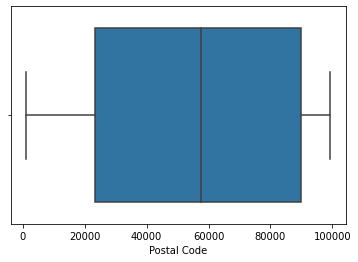

In [18]:
sns.boxplot(x='Postal Code', data=df)

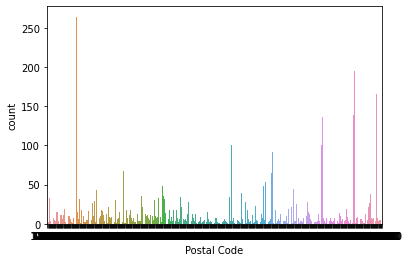

In [19]:
sns.countplot(x='Postal Code',data=df)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


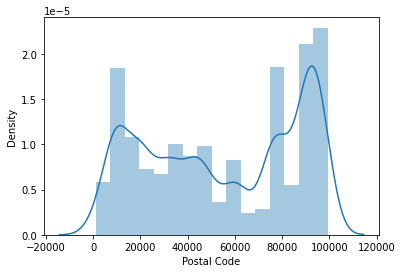

In [20]:
sns.distplot(df["Postal Code"])

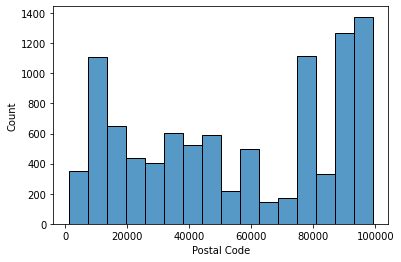

In [21]:
sns.histplot(x='Postal Code',data=df)